In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
X_train = pd. read_csv("X_train_scaled.csv")
X_train.shape

(425, 30)

In [3]:
X_test = pd. read_csv("X_test_scaled.csv")
X_test.shape

(142, 30)

In [4]:
y_train = pd. read_csv("y_train_categorical.csv")
y_train = y_train.iloc[:, 0]
y_train.shape

(425,)

In [5]:
y_test = pd. read_csv("y_test_categorical.csv")
y_test = y_test.iloc[:, 0]
y_test.shape

(142,)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix

In [7]:
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_predict =knn_model.predict(X_test)
y_predict

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1.])

In [10]:
cm = confusion_matrix(y_test,y_predict)

<AxesSubplot:>

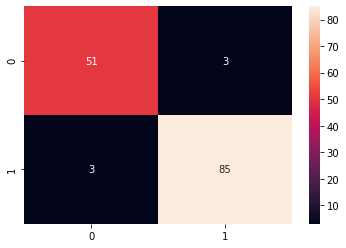

In [11]:
sns.heatmap(cm ,annot=True)

In [15]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, knn_model.predict(X_test)))

Train set Accuracy:  0.9788235294117648
Test set Accuracy:  0.9577464788732394


In [16]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        54
         1.0       0.97      0.97      0.97        88

    accuracy                           0.96       142
   macro avg       0.96      0.96      0.96       142
weighted avg       0.96      0.96      0.96       142



In [17]:
k = 5

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat6 = neigh6.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.9788235294117648
Test set Accuracy:  0.9577464788732394


In [19]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.95070423, 0.95070423, 0.95774648, 0.96478873, 0.95774648,
       0.96478873, 0.95774648, 0.96478873, 0.97183099, 0.96478873,
       0.97183099, 0.97183099, 0.96478873, 0.96478873])

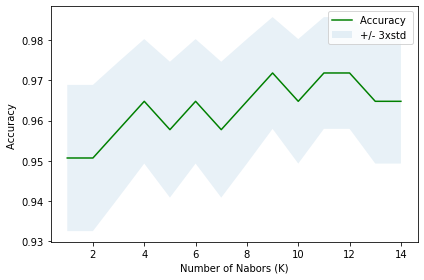

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [22]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.971830985915493 with k= 9


In [23]:
k = 9

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat6 = neigh6.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.9764705882352941
Test set Accuracy:  0.971830985915493
